In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs

Classifier:
SGDClassifier(alpha=0.000518555977778, average=False, class_weight=None,
       epsilon=0.1, eta0=0.774672877868, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=77, n_jobs=1,
       penalty='l2', power_t=1.08966490277, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 0.500 +- 0.000
           precision: 0.000 +- 0.000


/home/martners/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/martners/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


              recall: 0.000 +- 0.000
                  f1: 0.000 +- 0.000


/home/martners/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/martners/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


   average_precision: 0.546 +- 0.044
             roc_auc: 0.541 +- 0.004
got estimeetaaa
got grammar:grammar is there oO
got forest
got heap
got dist
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 0.5
accept_static_penalty: 0.0
batch_size: 3
   burnout: 0
complexity: 3
 estimator: SGDClassifier(alpha=0.000518555977778, average=False, class_weight=None,
       epsilon=0.1, eta0=0.774672877868, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=77, n_jobs=1,
       penalty='l2', power_t=1.08966490277, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
estimatorobject: <graphlearn.estimator.estimator instance at 0x4af87a0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x4b15248>
generatormode: False
hash_bitmask: 1048575
keep_duplicates: False
local_substitutable_graph_grammar: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar instance at 0x5e5e050>
    n_jobs

/home/martners/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/martners/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


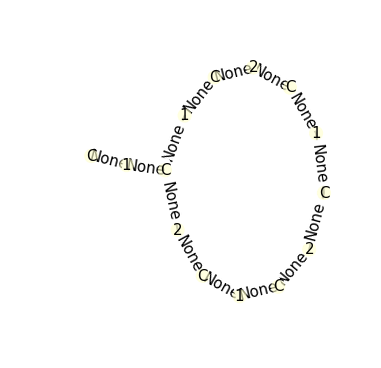

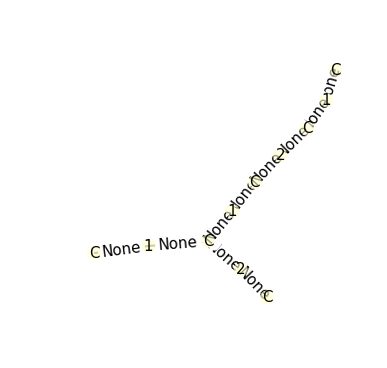

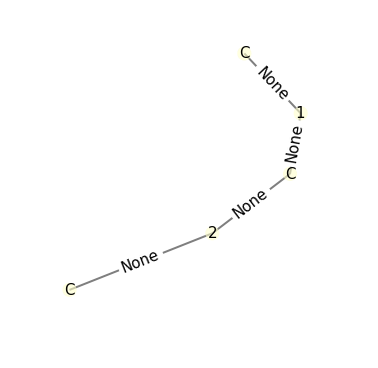

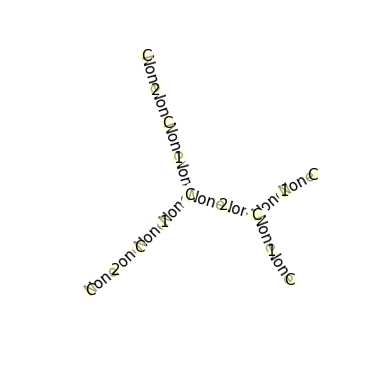

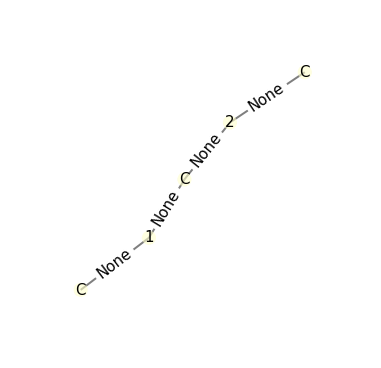

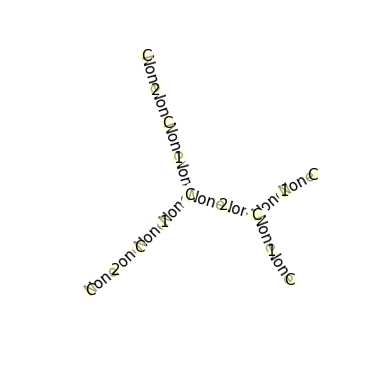

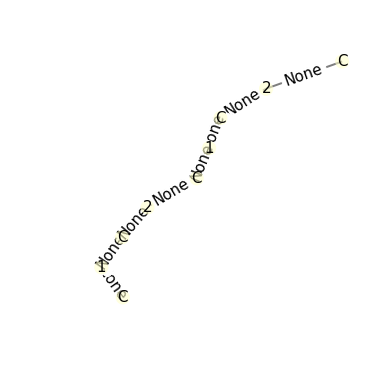

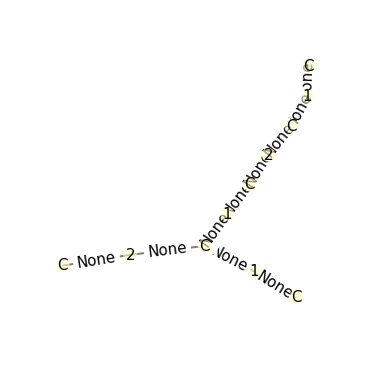

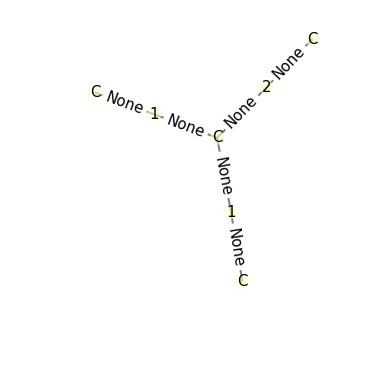

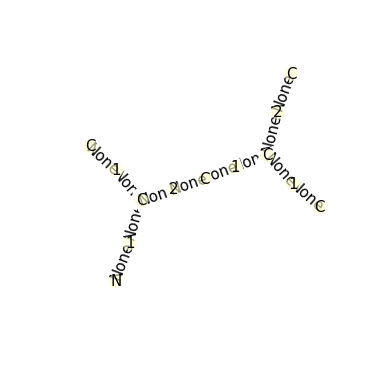

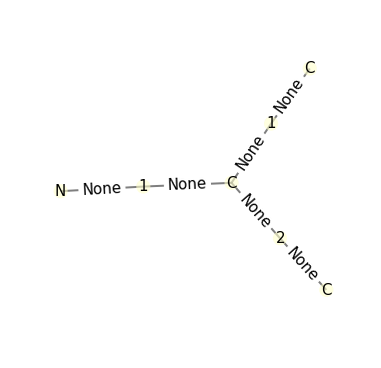

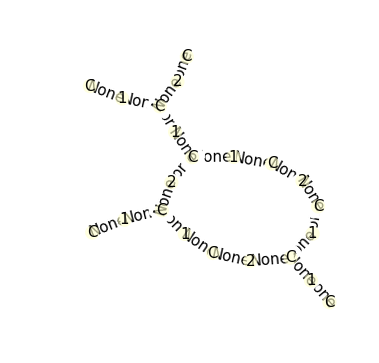

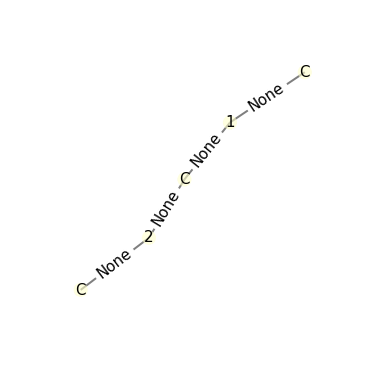

KeyboardInterrupt: 

In [3]:
'''
lets see IF WE CAN SAMPLE SOME DISCZ
'''
%time
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
import graphlearn.discsampler as ds
disc = ds.DiscSampler()
# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=200
pos = itertools.islice(training_graphs,training_size)
pos,pos2 = itertools.tee(pos)
training_graphs2 = gspan_to_eden( 'bursi.neg.gspan' )
neg = itertools.islice(training_graphs,training_size)
gr=disc.sample_graphs(pos,neg, radius=.2, how_many= 100, check_k=30)
draw_graph_set_graphlearn(gr)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


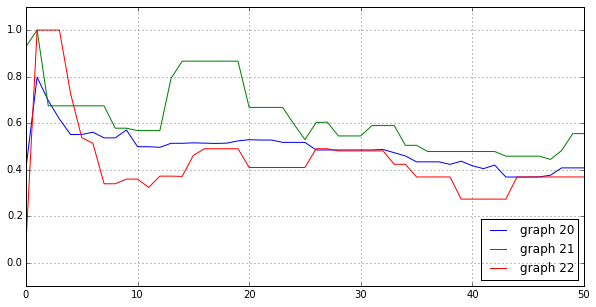

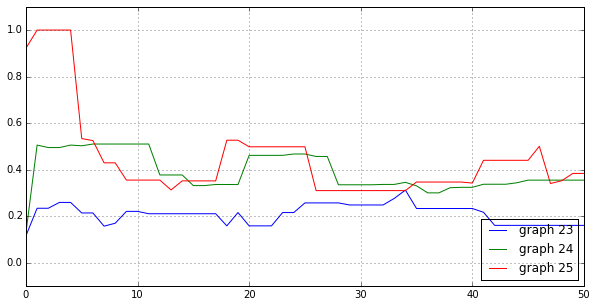

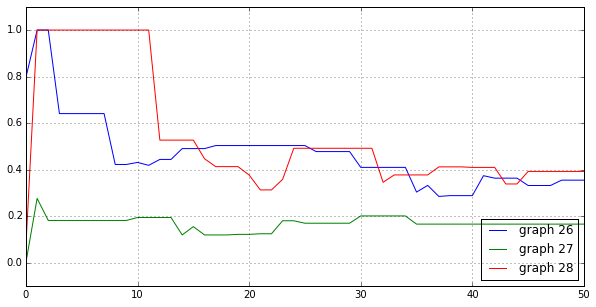

In [1]:
'''
lets see how the distance is developing  while doing the improvement thing
ok distance is just useless oOo
'''
%time
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as ge
from eden.modifier.graph.vertex_attributes import colorize 
#from sklearn.metrics.pairwise import euclidean_distances as dist
#from sklearn.metrics.pairwise import linear_kernel as dist
from sklearn.metrics.pairwise import cosine_distances as dist
class show_distance(gl.GraphLearnSampler):
    # stop score tracking:
    def _score_list_append(self,graph):
        pass
    #hijack stop condition to save different values
    def _stop_condition(self,graph):
        
        if self.step == 0:
            self.vectorizer._reference_vec = self.vectorizer.transform_single(graph)
        else:    
            x = self.vectorizer.transform_single(graph)
            
            similarity = self.vectorizer._reference_vec.dot(x.T).todense()[0,0]
            #similarity= dist(x, self.vectorizer._reference_vec)
            self._score_list.append(similarity)
            #print similarity

            
            
            
# learn a grammar
training_graphs = gspan_to_eden( 'bursi.pos.gspan' )
training_size=50
training_graphs = itertools.islice(training_graphs,training_size)
sampler=show_distance(radius_list=[1,2],thickness_list=[1,2])
#sampler.fit(training_graphs,n_jobs=-1, core_interface_pair_remove_threshold=2, interface_remove_threshold=2)
#sampler.save('tmp/demo.ge')            
                         
#sampler=show_distance()
#sampler=gl.GraphLearnSampler()
sampler.load('tmp/demo.ge')

graphs = gspan_to_eden( 'bursi.pos.gspan' )

id_start=20
id_end=id_start+9

graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50
sampling_interval=int(n_steps/5)+1
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=True,
                        sampling_interval=sampling_interval,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        annealing_factor=.5,
                        probabilistic_core_choice=True,
                        burnout=1,
                        select_cip_max_tries=100)

  
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])

from itertools import islice
import numpy as np

step=sampling_interval
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()    
    

In [23]:
import numpy as np 
from itertools import izip
a = np.arange(6).reshape(2,3)
print a

for x,y in izip(range(3),iter(a)):#np.nditer(a, flags=['external_loop'], order='C'):
     print x,y

[[0 1 2]
 [3 4 5]]
0 [0 1 2]
1 [3 4 5]


In [5]:
class Base(object):
    def __init__(self):
        print "Base created"

class ChildA(Base):
    def __init__(self):
        Base.__init__(self)

class ChildB(Base):
    def __init__(self):
        super(ChildB, self).__init__()

ChildA() 
ChildB()

Base created
Base created
